In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
pop = pd.read_csv("/content/drive/MyDrive/KSA_Qassim_Energy/Qassim.csv")
pop

,year,growthRate,Qassim,Oil_GDP,Non_Oil_GDP,total_GDP
0,2010,0.0383,1222742,1172450,808327,1980777
1,2011,0.0383,1251946,1303517,875276,2178792
2,2012,0.0383,1279631,1372719,923978,2296697
3,2013,0.0383,1306957,1370818,987872,2358690
4,2014,0.0383,1334617,1403651,1041190,2444841
5,2015,0.0383,1362085,1467402,1077834,2545236
6,2016,0.0383,1389929,1507207,1080535,2587742
7,2017,0.0383,1423130,1471056,1097537,2568592
8,2018,0.0383,1455693,1567674,1059996,2627670
9,2019,0.0263,1488285,1544708,1095103,2639811


In [ ]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         23 non-null     int64  
 1   growthRate   23 non-null     float64
 2   Qassim       23 non-null     int64  
 3   Oil_GDP      23 non-null     int64  
 4   Non_Oil_GDP  23 non-null     int64  
 5   total_GDP    23 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 1.2 KB


In [ ]:
temp = pd.read_csv("/content/drive/MyDrive/KSA_Qassim_Energy/NLTP_F_HOURLY_Qassim.csv")
temp

,Date,Time,Datetime,System_City_Actual,Operating_Area,System_City
0,1-Jun-16,0:00,01JUN16:00:00,30.0,COA,Qassim
1,2-Jun-16,0:00,02JUN16:00:00,28.0,COA,Qassim
2,3-Jun-16,0:00,03JUN16:00:00,31.8,COA,Qassim
3,4-Jun-16,0:00,04JUN16:00:00,31.2,COA,Qassim
4,5-Jun-16,0:00,05JUN16:00:00,31.0,COA,Qassim
...,...,...,...,...,...,...
48216,27-Nov-20,23:00,27NOV20:23:00,17.0,COA,Qassim
48217,28-Nov-20,23:00,28NOV20:23:00,16.0,COA,Qassim
48218,29-Nov-20,23:00,29NOV20:23:00,13.0,COA,Qassim
48219,30-Nov-20,23:00,30NOV20:23:00,14.0,COA,Qassim


In [ ]:
temp.tail(50)

,Date,Time,Datetime,System_City_Actual,Operating_Area,System_City
48171,12-Oct-20,23:00,12OCT20:23:00,22.0,COA,Qassim
48172,13-Oct-20,23:00,13OCT20:23:00,22.0,COA,Qassim
48173,14-Oct-20,23:00,14OCT20:23:00,22.0,COA,Qassim
48174,15-Oct-20,23:00,15OCT20:23:00,24.0,COA,Qassim
48175,16-Oct-20,23:00,16OCT20:23:00,23.0,COA,Qassim
48176,17-Oct-20,23:00,17OCT20:23:00,22.0,COA,Qassim
48177,18-Oct-20,23:00,18OCT20:23:00,23.0,COA,Qassim
48178,19-Oct-20,23:00,19OCT20:23:00,20.0,COA,Qassim
48179,20-Oct-20,23:00,20OCT20:23:00,19.0,COA,Qassim
48180,21-Oct-20,23:00,21OCT20:23:00,21.0,COA,Qassim


In [ ]:
temp.sample(50)

,Date,Time,Datetime,System_City_Actual,Operating_Area,System_City
10432,22-Sep-19,5:00,22SEP19:05:00,25.0,COA,Qassim
19468,27-Mar-19,9:00,27MAR19:09:00,18.0,COA,Qassim
40992,13-Dec-20,20:00,13DEC20:20:00,17.0,COA,Qassim
8242,12-Jun-18,4:00,12JUN18:04:00,27.0,COA,Qassim
3664,1-Apr-21,1:00,01APR21:01:00,28.0,COA,Qassim
39827,7-Apr-21,19:00,07APR21:19:00,31.0,COA,Qassim
13805,21-Oct-18,6:00,21OCT18:06:00,20.0,COA,Qassim
23349,22-Apr-17,11:00,22APR17:11:00,31.0,COA,Qassim
33437,27-Apr-17,16:00,27APR17:16:00,38.0,COA,Qassim
35462,9-May-17,17:00,09MAY17:17:00,38.0,COA,Qassim


In [ ]:
temp.describe()

,System_City_Actual
count,48130.000000
mean,26.943306
std,9.982238
min,-2.000000
25%,19.000000
50%,27.000000
75%,35.000000
max,48.000000


In [ ]:
temp.groupby(['Time']).mean()

,System_City_Actual
Time,
0:00,24.479425
10:00,27.906885
11:00,29.798115
12:00,31.186197
13:00,32.250000
14:00,33.022897
15:00,33.660896
16:00,33.403683
17:00,32.566103


In [ ]:
temp.groupby(["Date"])["System_City_Actual"].mean()

Date
1-Apr-16    19.173913
1-Apr-17    26.850000
1-Apr-18    21.291667
1-Apr-19    19.625000
1-Apr-20    27.458333
              ...    
9-Sep-16    36.833333
9-Sep-17    35.333333
9-Sep-18    35.345833
9-Sep-19    33.583333
9-Sep-20    33.083333
Name: System_City_Actual, Length: 2056, dtype: float64

In [ ]:
temp.describe(include="O")

,Date,Time,Datetime,Operating_Area,System_City
count,48221,48221,48221,48221,48221
unique,2056,24,48221,1,1
top,11-Jan-19,9:00,01JUN16:00:00,COA,Qassim
freq,24,2029,1,48221,48221


In [ ]:
temp['Date'] = pd.to_datetime(temp['Date'])  

In [ ]:
temp['Month'] = pd.DatetimeIndex(temp['Date']).month
temp['Day'] = pd.DatetimeIndex(temp['Date']).day
temp['Year'] = pd.DatetimeIndex(temp['Date']).year

In [ ]:
temp

,Date,Time,Datetime,System_City_Actual,Operating_Area,System_City,Month,Day,Year
0,2016-06-01,0:00,01JUN16:00:00,30.0,COA,Qassim,6,1,2016
1,2016-06-02,0:00,02JUN16:00:00,28.0,COA,Qassim,6,2,2016
2,2016-06-03,0:00,03JUN16:00:00,31.8,COA,Qassim,6,3,2016
3,2016-06-04,0:00,04JUN16:00:00,31.2,COA,Qassim,6,4,2016
4,2016-06-05,0:00,05JUN16:00:00,31.0,COA,Qassim,6,5,2016
...,...,...,...,...,...,...,...,...,...
48216,2020-11-27,23:00,27NOV20:23:00,17.0,COA,Qassim,11,27,2020
48217,2020-11-28,23:00,28NOV20:23:00,16.0,COA,Qassim,11,28,2020
48218,2020-11-29,23:00,29NOV20:23:00,13.0,COA,Qassim,11,29,2020
48219,2020-11-30,23:00,30NOV20:23:00,14.0,COA,Qassim,11,30,2020


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48221 entries, 0 to 48220
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                48221 non-null  datetime64[ns]
 1   Time                48221 non-null  object        
 2   Datetime            48221 non-null  object        
 3   System_City_Actual  48130 non-null  float64       
 4   Operating_Area      48221 non-null  object        
 5   System_City         48221 non-null  object        
 6   Month               48221 non-null  int64         
 7   Day                 48221 non-null  int64         
 8   Year                48221 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [ ]:
temp.min()

Date                  2016-01-01 00:00:00
Time                                 0:00
Datetime                    01APR16:00:00
System_City_Actual                   -2.0
Operating_Area                        COA
System_City                        Qassim
Month                                   1
Day                                     1
Year                                 2016
dtype: object

In [ ]:
temp.max()

Date                  2021-09-02 00:00:00
Time                                 9:00
Datetime                    31OCT20:23:00
System_City_Actual                   48.0
Operating_Area                        COA
System_City                        Qassim
Month                                  12
Day                                    31
Year                                 2021
dtype: object

In [ ]:
temp.isnull().sum()

Date                   0
Time                   0
Datetime               0
System_City_Actual    91
Operating_Area         0
System_City            0
Month                  0
Day                    0
Year                   0
dtype: int64

In [ ]:
temp[temp["System_City_Actual"]<=22]

,Date,Time,Datetime,System_City_Actual,Operating_Area,System_City,Month,Day,Year
696,2016-12-01,0:00,01DEC16:00:00,18.0,COA,Qassim,12,1,2016
697,2016-12-02,0:00,02DEC16:00:00,22.0,COA,Qassim,12,2,2016
699,2016-12-04,0:00,04DEC16:00:00,17.0,COA,Qassim,12,4,2016
700,2016-12-05,0:00,05DEC16:00:00,15.0,COA,Qassim,12,5,2016
701,2016-12-06,0:00,06DEC16:00:00,15.0,COA,Qassim,12,6,2016
...,...,...,...,...,...,...,...,...,...
48216,2020-11-27,23:00,27NOV20:23:00,17.0,COA,Qassim,11,27,2020
48217,2020-11-28,23:00,28NOV20:23:00,16.0,COA,Qassim,11,28,2020
48218,2020-11-29,23:00,29NOV20:23:00,13.0,COA,Qassim,11,29,2020
48219,2020-11-30,23:00,30NOV20:23:00,14.0,COA,Qassim,11,30,2020


In [ ]:
temp[temp["System_City_Actual"]>=22]

,Date,Time,Datetime,System_City_Actual,Operating_Area,System_City,Month,Day,Year
0,2016-06-01,0:00,01JUN16:00:00,30.0,COA,Qassim,6,1,2016
1,2016-06-02,0:00,02JUN16:00:00,28.0,COA,Qassim,6,2,2016
2,2016-06-03,0:00,03JUN16:00:00,31.8,COA,Qassim,6,3,2016
3,2016-06-04,0:00,04JUN16:00:00,31.2,COA,Qassim,6,4,2016
4,2016-06-05,0:00,05JUN16:00:00,31.0,COA,Qassim,6,5,2016
...,...,...,...,...,...,...,...,...,...
48201,2020-11-11,23:00,11NOV20:23:00,22.0,COA,Qassim,11,11,2020
48202,2020-11-12,23:00,12NOV20:23:00,22.0,COA,Qassim,11,12,2020
48205,2020-11-15,23:00,15NOV20:23:00,25.0,COA,Qassim,11,15,2020
48208,2020-11-19,23:00,19NOV20:23:00,22.0,COA,Qassim,11,19,2020


In [ ]:
def plotBoxNdendity(temperature_1,col=None):
    if col in temp.columns:
        plt.figure(figsize=(18,8))

    ax1 = plt.subplot(121)
    temp.boxplot(col,ax=ax1)
    ax1.set_ylabel('Boxplot temperature levels in Qassim', fontsize=10)

    ax2 = plt.subplot(122)
    temp[col].plot(ax=ax2,legend=True,kind='density')
    ax2.set_ylabel('Temperature distribution in Qassim', fontsize=10)

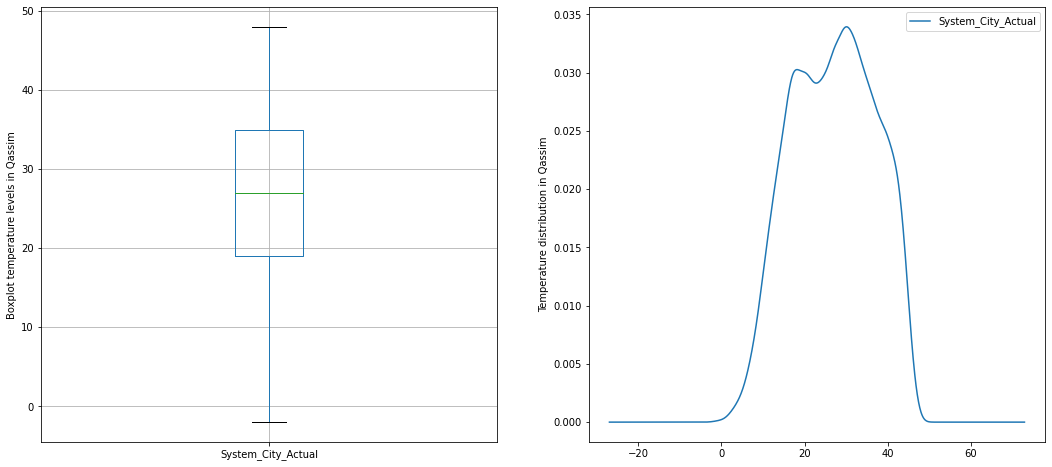

In [ ]:
plotBoxNdendity(temp,'System_City_Actual')

In [ ]:
print(len(temp[temp["System_City_Actual"] <0]))
temp[temp["System_City_Actual"]< 0].head(9)

9


,Date,Time,Datetime,System_City_Actual,Operating_Area,System_City,Month,Day,Year
8901,2017-02-04,4:00,04FEB17:04:00,-1.0,COA,Qassim,2,4,2017
10873,2017-02-03,5:00,03FEB17:05:00,-1.0,COA,Qassim,2,3,2017
10874,2017-02-04,5:00,04FEB17:05:00,-2.0,COA,Qassim,2,4,2017
12804,2016-01-30,6:00,30JAN16:06:00,-0.5,COA,Qassim,1,30,2016
12866,2017-02-03,6:00,03FEB17:06:00,-1.0,COA,Qassim,2,3,2017
12867,2017-02-04,6:00,04FEB17:06:00,-1.0,COA,Qassim,2,4,2017
14823,2016-01-30,7:00,30JAN16:07:00,-1.0,COA,Qassim,1,30,2016
14878,2017-02-03,7:00,03FEB17:07:00,-1.0,COA,Qassim,2,3,2017
14879,2017-02-04,7:00,04FEB17:07:00,-1.0,COA,Qassim,2,4,2017


In [ ]:
temp.groupby(["Year"])["System_City_Actual"].mean()

Year
2016    27.093291
2017    27.400800
2018    27.035058
2019    26.174341
2020    25.975120
2021    28.481857
Name: System_City_Actual, dtype: float64

In [ ]:
dD = temp.groupby(['Date','Year','Month',"Day"])[["System_City_Actual"]].min().reset_index()
dD
miN = pd.DataFrame(dD)
miN.head(40)

,Date,Year,Month,Day,System_City_Actual
0,2016-01-01,2016,1,1,14.0
1,2016-01-02,2016,1,2,8.0
2,2016-01-03,2016,1,3,6.0
3,2016-01-04,2016,1,4,4.0
4,2016-01-05,2016,1,5,8.4
5,2016-01-06,2016,1,6,10.0
6,2016-01-07,2016,1,7,9.0
7,2016-01-08,2016,1,8,14.0
8,2016-01-09,2016,1,9,12.0
9,2016-01-10,2016,1,10,9.0


In [ ]:
minTemp = miN["System_City_Actual"]
minTemp

0       14.0
1        8.0
2        6.0
3        4.0
4        8.4
        ... 
2051    27.0
2052    27.0
2053    26.0
2054    33.0
2055    33.0
Name: System_City_Actual, Length: 2056, dtype: float64

In [ ]:
miN.shape

(2056, 5)

In [ ]:
dd = temp.groupby(['Date','Year','Month',"Day"])[["System_City_Actual"]].max().reset_index()
maX = pd.DataFrame(dd)
maX.head(40)

,Date,Year,Month,Day,System_City_Actual
0,2016-01-01,2016,1,1,20.0
1,2016-01-02,2016,1,2,14.0
2,2016-01-03,2016,1,3,14.0
3,2016-01-04,2016,1,4,17.0
4,2016-01-05,2016,1,5,22.0
5,2016-01-06,2016,1,6,22.0
6,2016-01-07,2016,1,7,23.0
7,2016-01-08,2016,1,8,27.0
8,2016-01-09,2016,1,9,21.0
9,2016-01-10,2016,1,10,20.0


In [ ]:
maX['minTemp'] = minTemp
maX

,Date,Year,Month,Day,System_City_Actual,minTemp
0,2016-01-01,2016,1,1,20.0,14.0
1,2016-01-02,2016,1,2,14.0,8.0
2,2016-01-03,2016,1,3,14.0,6.0
3,2016-01-04,2016,1,4,17.0,4.0
4,2016-01-05,2016,1,5,22.0,8.4
...,...,...,...,...,...,...
2051,2021-08-29,2021,8,29,44.0,27.0
2052,2021-08-30,2021,8,30,44.0,27.0
2053,2021-08-31,2021,8,31,44.0,26.0
2054,2021-09-01,2021,9,1,33.0,33.0


In [ ]:
mm = temp.groupby(['Date','Year','Month',"Day"])[["System_City_Actual"]].mean().reset_index()
mean = pd.DataFrame(mm)
mean.head(40)

,Date,Year,Month,Day,System_City_Actual
0,2016-01-01,2016,1,1,15.571429
1,2016-01-02,2016,1,2,11.272727
2,2016-01-03,2016,1,3,10.000000
3,2016-01-04,2016,1,4,10.933333
4,2016-01-05,2016,1,5,15.117391
5,2016-01-06,2016,1,6,15.312500
6,2016-01-07,2016,1,7,15.637500
7,2016-01-08,2016,1,8,19.791667
8,2016-01-09,2016,1,9,16.482609
9,2016-01-10,2016,1,10,14.091667


In [ ]:
meanTemp = mean["System_City_Actual"]
meanTemp

0       15.571429
1       11.272727
2       10.000000
3       10.933333
4       15.117391
          ...    
2051    36.383333
2052    35.925000
2053    35.916667
2054    33.000000
2055    33.000000
Name: System_City_Actual, Length: 2056, dtype: float64

In [ ]:
maX['menTemp'] = meanTemp
maX

,Date,Year,Month,Day,System_City_Actual,minTemp,menTemp
0,2016-01-01,2016,1,1,20.0,14.0,15.571429
1,2016-01-02,2016,1,2,14.0,8.0,11.272727
2,2016-01-03,2016,1,3,14.0,6.0,10.000000
3,2016-01-04,2016,1,4,17.0,4.0,10.933333
4,2016-01-05,2016,1,5,22.0,8.4,15.117391
...,...,...,...,...,...,...,...
2051,2021-08-29,2021,8,29,44.0,27.0,36.383333
2052,2021-08-30,2021,8,30,44.0,27.0,35.925000
2053,2021-08-31,2021,8,31,44.0,26.0,35.916667
2054,2021-09-01,2021,9,1,33.0,33.0,33.000000


In [ ]:
maX.rename(columns={'System_City_Actual':'maxTemp'},inplace=True, errors='raise')

In [ ]:
maX.head(40)

,Date,Year,Month,Day,maxTemp,minTemp,menTemp
0,2016-01-01,2016,1,1,20.0,14.0,15.571429
1,2016-01-02,2016,1,2,14.0,8.0,11.272727
2,2016-01-03,2016,1,3,14.0,6.0,10.000000
3,2016-01-04,2016,1,4,17.0,4.0,10.933333
4,2016-01-05,2016,1,5,22.0,8.4,15.117391
5,2016-01-06,2016,1,6,22.0,10.0,15.312500
6,2016-01-07,2016,1,7,23.0,9.0,15.637500
7,2016-01-08,2016,1,8,27.0,14.0,19.791667
8,2016-01-09,2016,1,9,21.0,12.0,16.482609
9,2016-01-10,2016,1,10,20.0,9.0,14.091667


In [ ]:
temp1 = maX

In [ ]:
temp1

,Date,Year,Month,Day,maxTemp,minTemp,menTemp
0,2016-01-01,2016,1,1,20.0,14.0,15.571429
1,2016-01-02,2016,1,2,14.0,8.0,11.272727
2,2016-01-03,2016,1,3,14.0,6.0,10.000000
3,2016-01-04,2016,1,4,17.0,4.0,10.933333
4,2016-01-05,2016,1,5,22.0,8.4,15.117391
...,...,...,...,...,...,...,...
2051,2021-08-29,2021,8,29,44.0,27.0,36.383333
2052,2021-08-30,2021,8,30,44.0,27.0,35.925000
2053,2021-08-31,2021,8,31,44.0,26.0,35.916667
2054,2021-09-01,2021,9,1,33.0,33.0,33.000000


CDD = (Max Day Temp. + Min Day Temp)/2 - 22

In [ ]:
temp1['CDD'] = (temp1['maxTemp']+maX["minTemp"])/2-22
temp1

,Date,Year,Month,Day,maxTemp,minTemp,menTemp,CDD
0,2016-01-01,2016,1,1,20.0,14.0,15.571429,-5.0
1,2016-01-02,2016,1,2,14.0,8.0,11.272727,-11.0
2,2016-01-03,2016,1,3,14.0,6.0,10.000000,-12.0
3,2016-01-04,2016,1,4,17.0,4.0,10.933333,-11.5
4,2016-01-05,2016,1,5,22.0,8.4,15.117391,-6.8
...,...,...,...,...,...,...,...,...
2051,2021-08-29,2021,8,29,44.0,27.0,36.383333,13.5
2052,2021-08-30,2021,8,30,44.0,27.0,35.925000,13.5
2053,2021-08-31,2021,8,31,44.0,26.0,35.916667,13.0
2054,2021-09-01,2021,9,1,33.0,33.0,33.000000,11.0


In [ ]:
temp1.head(50)

,Date,Year,Month,Day,maxTemp,minTemp,menTemp,CDD
0,2016-01-01,2016,1,1,20.0,14.0,15.571429,-5.00
1,2016-01-02,2016,1,2,14.0,8.0,11.272727,-11.00
2,2016-01-03,2016,1,3,14.0,6.0,10.000000,-12.00
3,2016-01-04,2016,1,4,17.0,4.0,10.933333,-11.50
4,2016-01-05,2016,1,5,22.0,8.4,15.117391,-6.80
5,2016-01-06,2016,1,6,22.0,10.0,15.312500,-6.00
6,2016-01-07,2016,1,7,23.0,9.0,15.637500,-6.00
7,2016-01-08,2016,1,8,27.0,14.0,19.791667,-1.50
8,2016-01-09,2016,1,9,21.0,12.0,16.482609,-5.50
9,2016-01-10,2016,1,10,20.0,9.0,14.091667,-7.50


In [ ]:
temp1.sample(30)

,Date,Year,Month,Day,maxTemp,minTemp,menTemp,CDD
1402,2019-11-10,2019,11,10,26.0,20.0,23.000000,1.00
533,2017-06-17,2017,6,17,47.0,29.0,37.970833,16.00
2050,2021-08-28,2021,8,28,44.0,27.0,36.375000,13.50
843,2018-04-23,2018,4,23,31.0,20.0,26.375000,3.50
1108,2019-01-18,2019,1,18,18.0,4.0,10.208333,-11.00
1803,2020-12-21,2020,12,21,21.0,12.0,15.958333,-5.50
1174,2019-03-25,2019,3,25,24.0,19.0,22.591667,-0.50
2005,2021-07-14,2021,7,14,45.0,29.0,37.583333,15.00
1298,2019-07-29,2019,7,29,45.0,29.0,37.541667,15.00
1662,2020-08-02,2020,8,2,45.0,31.0,38.583333,16.00


In [ ]:
temp1.to_csv('temp2.csv',index=False)

In [ ]:
temp3 = pd.read_csv("/content/drive/MyDrive/KSA_Qassim_Energy/temp2 (1).csv")
temp3

,Date,Year,Month,Day,maxTemp,minTemp,menTemp,CDD
0,2016-01-01,2016,1,1,20.0,14.0,15.571429,-5.0
1,2016-01-02,2016,1,2,14.0,8.0,11.272727,-11.0
2,2016-01-03,2016,1,3,14.0,6.0,10.000000,-12.0
3,2016-01-04,2016,1,4,17.0,4.0,10.933333,-11.5
4,2016-01-05,2016,1,5,22.0,8.4,15.117391,-6.8
...,...,...,...,...,...,...,...,...
2051,2021-08-29,2021,8,29,44.0,27.0,36.383333,13.5
2052,2021-08-30,2021,8,30,44.0,27.0,35.925000,13.5
2053,2021-08-31,2021,8,31,44.0,26.0,35.916667,13.0
2054,2021-09-01,2021,9,1,33.0,33.0,33.000000,11.0


In [ ]:
year=temp3.groupby(['Month','Day'])['menTemp'].mean().reset_index()
year['CDD'] = year["menTemp"]-22
year

,Month,Day,menTemp,CDD
0,1,1,15.959153,-6.040847
1,1,2,15.969404,-6.030596
2,1,3,14.834912,-7.165088
3,1,4,14.302114,-7.697886
4,1,5,14.505676,-7.494324
...,...,...,...,...
361,12,27,15.362681,-6.637319
362,12,28,13.794792,-8.205208
363,12,29,13.698279,-8.301721
364,12,30,17.219867,-4.780133


In [ ]:
year[year['Month']==2]
year["Month"] = year["Month"].astype("int") 
year["Day"] = year["Day"].astype("int") 

In [ ]:
year['join'] = year[['Month','Day']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [ ]:
year=year.drop(['Day', 'Month'], axis=1)

In [ ]:
year

,menTemp,CDD,join
0,15.959153,-6.040847,1-1
1,15.969404,-6.030596,1-2
2,14.834912,-7.165088,1-3
3,14.302114,-7.697886,1-4
4,14.505676,-7.494324,1-5
...,...,...,...
361,15.362681,-6.637319,12-27
362,13.794792,-8.205208,12-28
363,13.698279,-8.301721,12-29
364,17.219867,-4.780133,12-30


In [ ]:
df1=temp3
df1.index=pd.DatetimeIndex(df1['Date'])
df1

,Date,Year,Month,Day,maxTemp,minTemp,menTemp,CDD
Date,,,,,,,,
2016-01-01,2016-01-01,2016,1,1,20.0,14.0,15.571429,-5.0
2016-01-02,2016-01-02,2016,1,2,14.0,8.0,11.272727,-11.0
2016-01-03,2016-01-03,2016,1,3,14.0,6.0,10.000000,-12.0
2016-01-04,2016-01-04,2016,1,4,17.0,4.0,10.933333,-11.5
2016-01-05,2016-01-05,2016,1,5,22.0,8.4,15.117391,-6.8
...,...,...,...,...,...,...,...,...
2021-08-29,2021-08-29,2021,8,29,44.0,27.0,36.383333,13.5
2021-08-30,2021-08-30,2021,8,30,44.0,27.0,35.925000,13.5
2021-08-31,2021-08-31,2021,8,31,44.0,26.0,35.916667,13.0


In [ ]:
def get_past_dates(start_date, into_past,offset=0):
    
    start = start_date - np.timedelta64(into_past, 'D')
    end = start_date 
    return np.arange(start, end, dtype='datetime64[D]')

In [ ]:
def get_future_dates(start_date, into_future, offset=1):

    start_date = start_date + np.timedelta64(offset,'D')
    end_date = start_date + np.timedelta64(into_future,'D')
    return np.arange(start_date, end_date, dtype='datetime64[D]')

In [ ]:
time_steps = get_past_dates(df1.index[0], 1826)

In [ ]:
past=pd.DataFrame({'Date':time_steps})
past['Month'] = pd.DatetimeIndex(past['Date']).month
past['Day']=pd.DatetimeIndex(past['Date']).day

In [ ]:
past['join'] = past[['Month','Day']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
past=past.merge(year,on='join')
past.sort_values(by='Date', inplace = True)
past

,Date,Month,Day,join,menTemp,CDD
0,2011-01-01,1,1,1-1,15.959153,-6.040847
5,2011-01-02,1,2,1-2,15.969404,-6.030596
10,2011-01-03,1,3,1-3,14.834912,-7.165088
15,2011-01-04,1,4,1-4,14.302114,-7.697886
20,2011-01-05,1,5,1-5,14.505676,-7.494324
...,...,...,...,...,...,...
1804,2015-12-27,12,27,12-27,15.362681,-6.637319
1809,2015-12-28,12,28,12-28,13.794792,-8.205208
1814,2015-12-29,12,29,12-29,13.698279,-8.301721
1819,2015-12-30,12,30,12-30,17.219867,-4.780133


In [ ]:
df1.index[-2]
next_time_steps = get_future_dates(df1.index[-2], 4015)
next_time_steps

array(['2021-09-02', '2021-09-03', '2021-09-04', ..., '2032-08-27',
       '2032-08-28', '2032-08-29'], dtype='datetime64[D]')

In [ ]:
future=pd.DataFrame({'Date':next_time_steps})
future['Month'] = pd.DatetimeIndex(future['Date']).month
future['Day']=pd.DatetimeIndex(future['Date']).day

In [ ]:
future['join'] = future[['Month','Day']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

future=future.merge(year,on='join')
future.sort_values(by='Date', inplace = True)
future

,Date,Month,Day,join,menTemp,CDD
0,2021-09-02,9,2,9-2,35.697222,13.697222
11,2021-09-03,9,3,9-3,36.036667,14.036667
22,2021-09-04,9,4,9-4,36.506667,14.506667
33,2021-09-05,9,5,9-5,36.651087,14.651087
44,2021-09-06,9,6,9-6,36.172464,14.172464
...,...,...,...,...,...,...
3937,2032-08-25,8,25,8-25,36.722222,14.722222
3948,2032-08-26,8,26,8-26,36.554650,14.554650
3959,2032-08-27,8,27,8-27,36.138889,14.138889
3970,2032-08-28,8,28,8-28,36.383696,14.383696


In [ ]:
temp3=temp3.dropna()
temp3['Date']=pd.DatetimeIndex(temp3['Date'])
temp3=temp3[['Date','menTemp','CDD']]
temp3

,Date,menTemp,CDD
Date,,,
2016-01-01,2016-01-01,15.571429,-5.0
2016-01-02,2016-01-02,11.272727,-11.0
2016-01-03,2016-01-03,10.000000,-12.0
2016-01-04,2016-01-04,10.933333,-11.5
2016-01-05,2016-01-05,15.117391,-6.8
...,...,...,...
2021-08-29,2021-08-29,36.383333,13.5
2021-08-30,2021-08-30,35.925000,13.5
2021-08-31,2021-08-31,35.916667,13.0


In [ ]:
past=past[['Date','menTemp','CDD']]
past

,Date,menTemp,CDD
0,2011-01-01,15.959153,-6.040847
5,2011-01-02,15.969404,-6.030596
10,2011-01-03,14.834912,-7.165088
15,2011-01-04,14.302114,-7.697886
20,2011-01-05,14.505676,-7.494324
...,...,...,...
1804,2015-12-27,15.362681,-6.637319
1809,2015-12-28,13.794792,-8.205208
1814,2015-12-29,13.698279,-8.301721
1819,2015-12-30,17.219867,-4.780133


In [ ]:
future=future[['Date','menTemp','CDD']]

future 

,Date,menTemp,CDD
11,2021-09-03,36.036667,14.036667
22,2021-09-04,36.506667,14.506667
33,2021-09-05,36.651087,14.651087
44,2021-09-06,36.172464,14.172464
55,2021-09-07,35.152899,13.152899
...,...,...,...
3937,2032-08-25,36.722222,14.722222
3948,2032-08-26,36.554650,14.554650
3959,2032-08-27,36.138889,14.138889
3970,2032-08-28,36.383696,14.383696


In [ ]:
vertical_concat = pd.concat([past, temp3], axis=0)
temp=pd.concat([vertical_concat, future], axis=0)
temp.rename(columns = {'menTemp':'Meantemp'}, inplace = True)
temp

,Date,Meantemp,CDD
0,2011-01-01,15.959153,-6.040847
5,2011-01-02,15.969404,-6.030596
10,2011-01-03,14.834912,-7.165088
15,2011-01-04,14.302114,-7.697886
20,2011-01-05,14.505676,-7.494324
...,...,...,...
3937,2032-08-25,36.722222,14.722222
3948,2032-08-26,36.554650,14.554650
3959,2032-08-27,36.138889,14.138889
3970,2032-08-28,36.383696,14.383696


In [ ]:
temp.to_csv('temp.csv',index=False)